# Data<br>


In [ ]:
import numpy as np
import tensorflow as tf
import cv2
from tensorflow import keras

## Load dataset

In [ ]:
file_path = '/content/kaggle.json'

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download  -d vasukipatel/face-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/vasukipatel/face-recognition-dataset
License(s): CC0-1.0
User cancelled operation


In [ ]:
import zipfile
import os
ref = '/content/face-recognition-dataset.zip'
extract = '/content/face-recognition-dataset'
os.makedirs(extract,exist_ok = True)
with zipfile.ZipFile(ref,'r') as zip_ref:
  zip_ref.extractall(extract)


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vasukipatel/face-recognition-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'face-recognition-dataset' dataset.
Path to dataset files: /kaggle/input/face-recognition-dataset


## Load Data

In [ ]:
Negative = '/content/Negative.jpg'

In [ ]:
# list of all images in folder faces
image_list = os.listdir('/content/face-recognition-dataset/Faces/Faces')
# ['Margot Robbie_29.jpg',
# 'Zac Efron_53.jpg',
#  'Lisa Kudrow_42.jpg',
#  'Henry Cavill_35.jpg',
#  'Virat Kohli_9.jpg']
# str(image_list[0]).split("_")[0] -> Margot Robbie
img1_path = os.path.join( '/content/face-recognition-dataset/Faces/Faces',image_list[0])
os.path.exists(img1_path)

True

In [ ]:
positive_path = os.path.join('/content/face-recognition-dataset/Original Images/Original Images/' +str(image_list[0]).split("_")[0]+"/")
positives = os.listdir(positive_path)
positive = os.path.join(positive_path,positives[0])
os.path.exists(positive)

# Face detection
1. use res10_300x300_ssd_iter_14000.caffemodel
2. CV2
3. Haarcascade_Classifier

In [ ]:

# frame = cv2.imread(img1_path)
# # frame = cv2.imread(positive)
# face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_alt.xml")
# faces = face_cascade.detectMultiScale(frame,1.1,5)
# if len(faces) > 0:
#   x,y,h,w  = faces[0]
#   cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
#   frame = frame[x:x+h,y:y+w]
# else :
#   print("no faces found")


array([[[115, 137, 179],
        [114, 136, 178],
        [  0, 255, 255],
        ...,
        [ 95, 125, 144],
        [ 60,  93, 109],
        [ 60,  93, 109]],

       [[115, 137, 179],
        [115, 137, 179],
        [  0, 255, 255],
        ...,
        [ 94, 124, 143],
        [ 58,  88, 107],
        [ 32,  62,  79]],

       [[112, 134, 176],
        [114, 136, 178],
        [  0, 255, 255],
        ...,
        [ 85, 112, 133],
        [ 75, 105, 124],
        [ 48,  78,  95]],

       ...,

       [[118, 149, 200],
        [120, 151, 202],
        [  0, 255, 255],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[119, 150, 201],
        [120, 151, 202],
        [122, 153, 204],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[122, 153, 204],
        [123, 154, 205],
        [123, 154, 205],
        ...,
        [117, 163, 181],
        [123, 169, 187],
        [125, 170, 191]]], dtype=uint8)
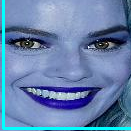

In [ ]:
# frame

In [ ]:
def detect_face(frame):
  face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_alt.xml")
  faces = face_cascade.detectMultiScale(frame,1.1,5)
  if len(faces) > 0:
    x,y,h,w  = faces[0]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
    return frame[x:x+h,y:y+w]
  else :
    print("no faces found")

# Models
   1. MobileFaceNet (TFLite)1M
   2. SFace (OpenCV built-in)1M
   3. ArcFace (MobileArcFace)1.5M
   4.



In [ ]:
path = '/content/facenet80m.tflite'

interpreter = tf.lite.Interpreter(model_path=path)
interpreter.allocate_tensors()


input_details  = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def preprocess(image_path , size=(160,160)):
  img = cv2.imread(image_path)
  img = detect_face(img)
  img= cv2.resize(img,size)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)
  img = img/255.0
  img  = np.expand_dims(img,axis=0)
  return img
def get_embed(face_img):
  preprocessed_img = preprocess(face_img)
  interpreter.set_tensor(input_details[0]['index'], preprocessed_img)
  interpreter.invoke()
  emb = interpreter.get_tensor(output_details[0]['index'])
  # Optionally L2‐normalize
  # emb = emb / np.linalg.norm(emb, axis=1, keepdims=True)
  return emb[0] ,preprocessed_img

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [ ]:
embedding1,img1 = get_embed(positive)
embedding2,img2 = get_embed(img1_path)

In [ ]:
img1

array([[[[1.        , 1.        , 0.        ],
         [1.        , 1.        , 0.        ],
         [1.        , 1.        , 0.        ],
         ...,
         [1.        , 1.        , 0.        ],
         [1.        , 1.        , 0.        ],
         [1.        , 1.        , 0.        ]],

        [[0.5137255 , 0.43137255, 0.03529412],
         [0.22352941, 0.10588235, 0.00784314],
         [0.23529412, 0.14117648, 0.05882353],
         ...,
         [0.5019608 , 0.24313726, 0.29803923],
         [0.5411765 , 0.28235295, 0.3372549 ],
         [1.        , 1.        , 0.        ]],

        [[0.49803922, 0.43137255, 0.05098039],
         [0.20784314, 0.12156863, 0.05098039],
         [0.16078432, 0.09019608, 0.03137255],
         ...,
         [0.4862745 , 0.22745098, 0.28235295],
         [0.5058824 , 0.24705882, 0.3019608 ],
         [1.        , 1.        , 0.        ]],

        ...,

        [[0.6666667 , 0.53333336, 0.12156863],
         [0.5764706 , 0.3764706 , 0.24705882]

In [ ]:
embedding2.shape

(512,)

# Embedding Comparison
3. Comparing Embeddings <br>
    1. Use KNN reconizer
    2. Try eucleudian **distance**
    2. cosine similarity
    3. Manhatten Distance

## euclidean_distance

In [ ]:
def euclidean_distance(emb1, emb2):
    return np.linalg.norm(emb1 - emb2)

## cosine similarity

In [ ]:
from numpy import dot
from numpy.linalg import norm
def cos_similarity(embed1, embed2):
  return dot(embed1, embed2)/(norm(embed1)*norm(embed2))

In [ ]:
sim100 = cos_similarity(embedding1,embedding1)
sim100

np.float32(1.0)

In [ ]:
sim50 = cos_similarity(embedding1,embedding2)
sim50

np.float32(0.77584136)

## Train SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', probability=True)
# clf.fit(embedding_vectors, labels)

## KNN

In [ ]:
def knn(known_embeds, known_labels, test_emb, k=3):
    dists = [np.linalg.norm(test_emb - e) for e in known_embeds]
    sorted_idx = np.argsort(dists)[:k]
    votes = [known_labels[i] for i in sorted_idx]
    return max(set(votes), key=votes.count)

# FINAL PIPELINE

working!!

In [ ]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
import tensorflow as tf
import cv2
from tensorflow import keras

path = '/content/facenet80m.tflite'
interpreter = tf.lite.Interpreter(model_path=path)
interpreter.allocate_tensors()
input_details  = interpreter.get_input_details()
output_details = interpreter.get_output_details()


def detect_face(frame):
  face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_alt.xml")
  faces = face_cascade.detectMultiScale(frame,1.1,5)
  if len(faces) > 0:
    x,y,h,w  = faces[0]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
    return frame[x:x+w,y:y+h]
  else :
    return None


# checking every person in the dir



def preprocess(face_img , size=(160,160)):
  # img = cv2.imread(image_path)
  img = detect_face(face_img)
  img= cv2.resize(img,size)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)
  img = img/255.0
  img  = np.expand_dims(img,axis=0)

  return img
def get_embed(face_img):
  preprocessed_img = preprocess(face_img)
  interpreter.set_tensor(input_details[0]['index'], preprocessed_img)
  interpreter.invoke()
  emb = interpreter.get_tensor(output_details[0]['index'])
  # Optionally L2‐normalize
  # emb = emb / np.linalg.norm(emb, axis=1, keepdims=True)
  return emb[0] ,preprocessed_img

def cos_similarity(embed1, embed2):
  return dot(embed1, embed2)/(norm(embed1)*norm(embed2))

def check_person(live_frame):
  persons_dir = '/content/face-recognition-dataset/Original Images/Original Images'
  persons_list=os.listdir(persons_dir)
  cv2.imread(live_frame)
  live_embed  = get_embed(live_frame)
  H_score = 0
  Name = ''
  for person in persons_list:
    person_pics = os.listdir(os.path.join(persons_dir,person))
    sim_score = []
    # check every pic
    # for person_pic in person_pics:
    #   cv2.imread(os.path.join(os.path.join(persons_dir,person),person_pic))
    for i in range(3):
      pic_embed = get_embed(cv2.imread(os.path.join(os.path.join(persons_dir,person),person_pics[i])))
      sim_score.append(cos_similarity(live_embed,pic_embed))
    if np.average(sim_score) > H_score:
      H_score = np.average(sim_score)
      Name = person





# -----------------------------LIVE-----------------------------------------
cap = cv2.VideoCapture(0)
while True:
  ret, frame = cap.read()
  if ret==False:
    continue
  else:
    face = detect_face(frame)
    if face == None:
      print("no face in the frame")
    else:
      check_person(frame)







In [ ]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
import tensorflow as tf
import cv2
import os
path = 'facenet80M.tflite'
interpreter = tf.lite.Interpreter(model_path=path)
interpreter.allocate_tensors()
input_details  = interpreter.get_input_details()
output_details = interpreter.get_output_details()


def detect_face(frame):
  face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
  faces = face_cascade.detectMultiScale(frame,1.05,5)
  if len(faces) > 0:
    x,y,h,w  = faces[0]
    # cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
    return frame[x:x+w,y:y+h]
  else :
    return None


# checking every person in the dir



# def preprocess(face_img , size=(160,160)):
#     if face_img is None:
#         print("⚠️ preprocess() received None image.")
#         return None

#     if face_img.size == 0:
#         print("⚠️ preprocess() received empty image.")
#         return None
#     img= cv2.resize(face_img,size)
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     img = img.astype(np.float32)
#     img = img/255.0
#     img  = np.expand_dims(img,axis=0)
#     return img

# def get_embed(face_img):
#   preprocessed_img = preprocess(face_img)
#   interpreter.set_tensor(input_details[0]['index'], preprocessed_img)
#   interpreter.invoke()
#   emb = interpreter.get_tensor(output_details[0]['index'])
# #   Optionally L2‐normalize
#   emb = emb / np.linalg.norm(emb, axis=1, keepdims=True)
#   return emb[0]


def preprocess(face_img, size=(160, 160)):
    if face_img is None:
        print("⚠️ preprocess() received None image.")
        return None

    if not isinstance(face_img, np.ndarray):
        print("⚠️ preprocess() received non-array input:", type(face_img))
        return None

    if face_img.size == 0:
        print("⚠️ preprocess() received empty image.")
        return None

    img = cv2.resize(face_img, size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    print(f"✅ preprocess() output shape: {img.shape}, dtype: {img.dtype}")
    return img


def get_embed(face_img):
    preprocessed_img = preprocess(face_img)
    if preprocessed_img is None:
        print("❌ Skipping embedding due to invalid preprocessing result.")
        return None

    # Check model input expectations
    expected_dtype = input_details[0]['dtype']
    expected_shape = input_details[0]['shape']

    print(f"Model expects: shape={expected_shape}, dtype={expected_dtype}")
    print(f"Received: shape={preprocessed_img.shape}, dtype={preprocessed_img.dtype}")

    # Ensure dtype and shape match
    preprocessed_img = preprocessed_img.astype(expected_dtype)

    interpreter.set_tensor(input_details[0]['index'], preprocessed_img)
    interpreter.invoke()
    emb = interpreter.get_tensor(output_details[0]['index'])

    # Normalize safely
    if np.linalg.norm(emb) == 0:
        print("⚠️ Zero norm embedding, skipping normalization.")
        return emb[0]

    emb = emb / np.linalg.norm(emb, axis=1, keepdims=True)
    return emb[0]


def cos_similarity(embed1, embed2):
  return dot(embed1, embed2)/(norm(embed1)*norm(embed2))

def check_person(live_frame):
  persons_dir = 'SiameseDataset/Original Images/Original Images'
  persons_list=os.listdir(persons_dir)
#   cv2.imread(live_frame)
  live_embed  = get_embed(live_frame)
  H_score = 0
  Name = ''
  for person in persons_list:
    person_pics = os.listdir(os.path.join(persons_dir,person))
    sim_score = []
    # check every pic
    # for person_pic in person_pics:
    #   cv2.imread(os.path.join(os.path.join(persons_dir,person),person_pic))
    for i in range(3):
      local_face = detect_face(cv2.imread(os.path.join(os.path.join(persons_dir,person),person_pics[i])))
      if local_face is not None:
        pic_embed = get_embed(local_face)
        if pic_embed is not None and live_embed is not None:
            sim_score.append(cos_similarity(live_embed, pic_embed))
    if np.average(sim_score) > H_score:
      H_score = np.average(sim_score)
      Name = person
  return H_score ,Name





# -----------------------------LIVE-----------------------------------------
cap = cv2.VideoCapture(0)
while True:
  ret, frame = cap.read()
  if ret==False:
    continue
  else:
    face = detect_face(frame)
    if face is None:
      print("no face in the frame")
    else:
        cv2.imshow("frame",face)
        if cv2.waitKey(1) & 0xFF == ord('A'):
            person,Name = check_person(face)
            print(person,Name)
            break

    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("👋 Quitting stream...")
        break
cap.release()
cv2.destroyAllWindows()








In [ ]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
import tensorflow as tf
import cv2
import os
path = 'facenet80M.tflite'
interpreter = tf.lite.Interpreter(model_path=path)
interpreter.allocate_tensors()
input_details  = interpreter.get_input_details()
output_details = interpreter.get_output_details()


def detect_face(frame):
  face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
  faces = face_cascade.detectMultiScale(frame,1.05,5)
  if len(faces) > 0:
    x,y,h,w  = faces[0]
    # cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
    return frame[x:x+w,y:y+h]
  else :
    return None


# checking every person in the dir



# def preprocess(face_img , size=(160,160)):
#     if face_img is None:
#         print("⚠️ preprocess() received None image.")
#         return None

#     if face_img.size == 0:
#         print("⚠️ preprocess() received empty image.")
#         return None
#     img= cv2.resize(face_img,size)
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     img = img.astype(np.float32)
#     img = img/255.0
#     img  = np.expand_dims(img,axis=0)
#     return img

# def get_embed(face_img):
#   preprocessed_img = preprocess(face_img)
#   interpreter.set_tensor(input_details[0]['index'], preprocessed_img)
#   interpreter.invoke()
#   emb = interpreter.get_tensor(output_details[0]['index'])
# #   Optionally L2‐normalize
#   emb = emb / np.linalg.norm(emb, axis=1, keepdims=True)
#   return emb[0]


def preprocess(face_img, size=(160, 160)):
    if face_img is None:
        print("⚠️ preprocess() received None image.")
        return None

    if not isinstance(face_img, np.ndarray):
        print("⚠️ preprocess() received non-array input:", type(face_img))
        return None

    if face_img.size == 0:
        print("⚠️ preprocess() received empty image.")
        return None

    img = cv2.resize(face_img, size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    print(f"✅ preprocess() output shape: {img.shape}, dtype: {img.dtype}")
    return img


def get_embed(face_img):
    preprocessed_img = preprocess(face_img)
    if preprocessed_img is None:
        print("❌ Skipping embedding due to invalid preprocessing result.")
        return None

    # Check model input expectations
    expected_dtype = input_details[0]['dtype']
    expected_shape = input_details[0]['shape']

    print(f"Model expects: shape={expected_shape}, dtype={expected_dtype}")
    print(f"Received: shape={preprocessed_img.shape}, dtype={preprocessed_img.dtype}")

    # Ensure dtype and shape match
    preprocessed_img = preprocessed_img.astype(expected_dtype)

    interpreter.set_tensor(input_details[0]['index'], preprocessed_img)
    interpreter.invoke()
    emb = interpreter.get_tensor(output_details[0]['index'])

    # Normalize safely
    if np.linalg.norm(emb) == 0:
        print("⚠️ Zero norm embedding, skipping normalization.")
        return emb[0]

    emb = emb / np.linalg.norm(emb, axis=1, keepdims=True)
    return emb[0]


def cos_similarity(embed1, embed2):
  return dot(embed1, embed2)/(norm(embed1)*norm(embed2))

def check_person(live_frame):
  persons_dir = 'SiameseDataset/Original Images/Original Images'
  persons_list=os.listdir(persons_dir)
#   cv2.imread(live_frame)
  live_embed  = get_embed(live_frame)
  H_score = 0
  Name = ''
  for person in persons_list:
    person_pics = os.listdir(os.path.join(persons_dir,person))
    sim_score = []
    # check every pic
    # for person_pic in person_pics:
    #   cv2.imread(os.path.join(os.path.join(persons_dir,person),person_pic))
    for i in range(3):
      local_face = detect_face(cv2.imread(os.path.join(os.path.join(persons_dir,person),person_pics[i])))
      if local_face is not None:
        pic_embed = get_embed(local_face)
        if pic_embed is not None and live_embed is not None:
            sim_score.append(cos_similarity(live_embed, pic_embed))
    if np.average(sim_score) > H_score:
      H_score = np.average(sim_score)
      Name = person
  return H_score ,Name





# -----------------------------LIVE-----------------------------------------
cap = cv2.VideoCapture(0)
while True:
  ret, frame = cap.read()
  if ret==False:
    continue
  else:
    face = detect_face(frame)
    if face is None:
      print("no face in the frame")
    else:
        cv2.imshow("frame",face)
        if cv2.waitKey(1) & 0xFF == ord('A'):
            person,Name = check_person(face)
            print(person,Name)
            break

    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("👋 Quitting stream...")
        break
cap.release()
cv2.destroyAllWindows()






